libraries

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from skimage import io
from shutil import copyfile
import sys
import time

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

#Load the datasets

In [5]:
train = pd.read_csv("scratch/train/train.csv")
#test = pd.read_csv("/kaggle/input/global-wheat-detection/test.csv")

In [6]:
train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,images (6).jpg,368,137,scratch,157,28,368,89
1,images (7).jpg,276,183,scratch,71,49,206,115
2,images (8).jpg,263,192,scratch,28,44,146,157
3,images (12).jpg,750,563,scratch,108,64,488,480
4,images (17).jpg,500,335,scratch,160,97,363,335


In [33]:
dir_train = os.listdir("scratch/train/")
dir_test = os.listdir("scratch/train/")

In [34]:
len(dir_test)

38

In [35]:
#Creating full path for each image ID
def creatingPath(x):
    return ("scratch/train/"+x+"")

train["path"] = train["filename"].apply(creatingPath)

In [36]:

#Plot some of the images
def plot_bbox(img_id):
  img_url = train.loc[train["filename"]==img_id]['path'].values[0]
  img = io.imread(img_url)
  height, width, channel = img.shape
  print(f"Image: {img.shape}")
  bboxs = train[train['filename']==img_id]
  for index, row in bboxs.iterrows():
      xmin = row['xmin']
      xmax = row['xmax']
      ymin = row['ymin']
      ymax = row['ymax']
      #xmin = int(xmin*width)
      #xmax = int(xmax*width)
      #ymin = int(ymin*height)
      #ymax = int(ymax*height)
      label_name = row['class']
      class_series = train[train["class"]==label_name]
      class_name = class_series["class"].values[0]
      print(f"Coordinates: {xmin,ymin}, {xmax,ymax}")
      cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0), 5)
      font = cv2.FONT_HERSHEY_SIMPLEX
      cv2.putText(img, class_name, (xmin,ymin-10), font, 1, (0,255,0), 5)
  plt.figure(figsize=(15,10))
  plt.title('Image with Bounding Box')
  plt.imshow(img)
  plt.axis("off")
  plt.show()

Image: (1503, 1999, 3)
Coordinates: (19, 737), (1935, 1059)


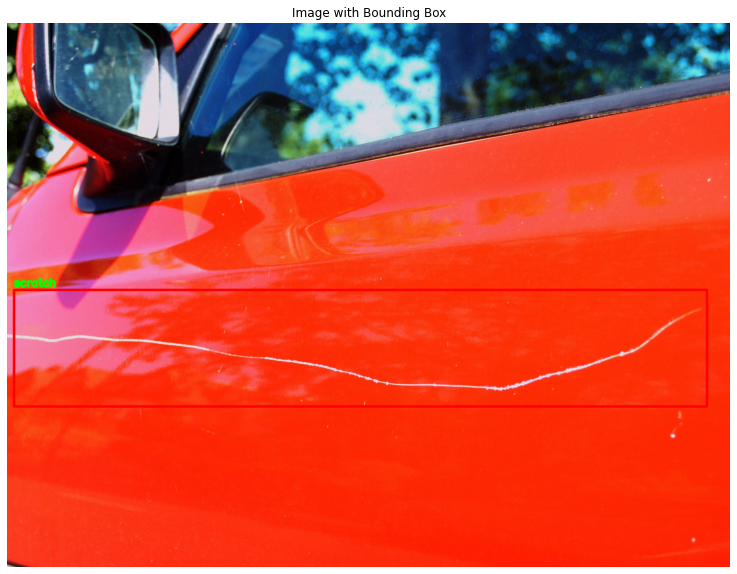

Image: (192, 263, 3)
Coordinates: (28, 44), (146, 157)


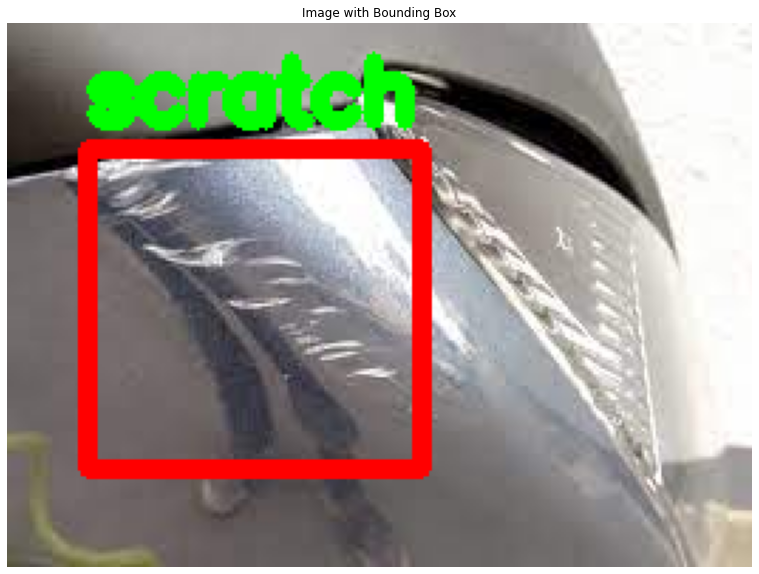

Image: (465, 689, 3)
Coordinates: (7, 82), (668, 458)


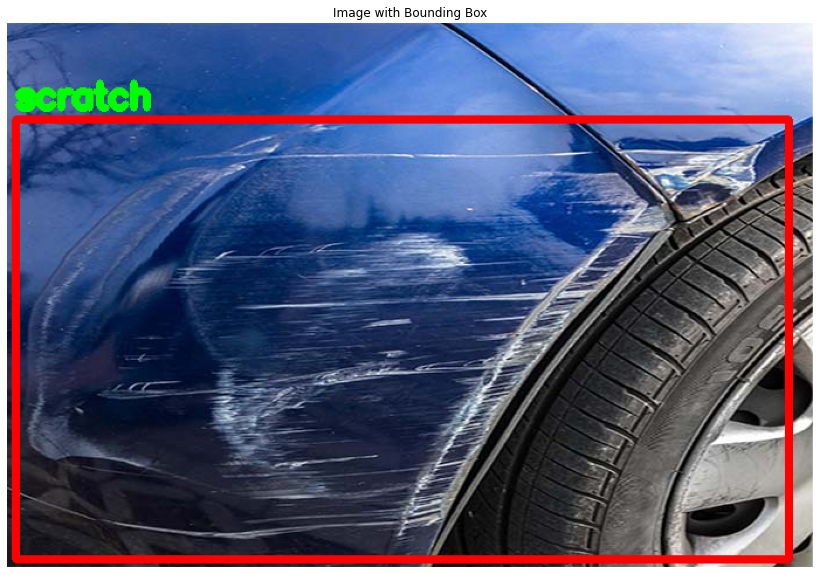

Image: (2419, 3226, 3)
Coordinates: (314, 692), (2913, 1248)


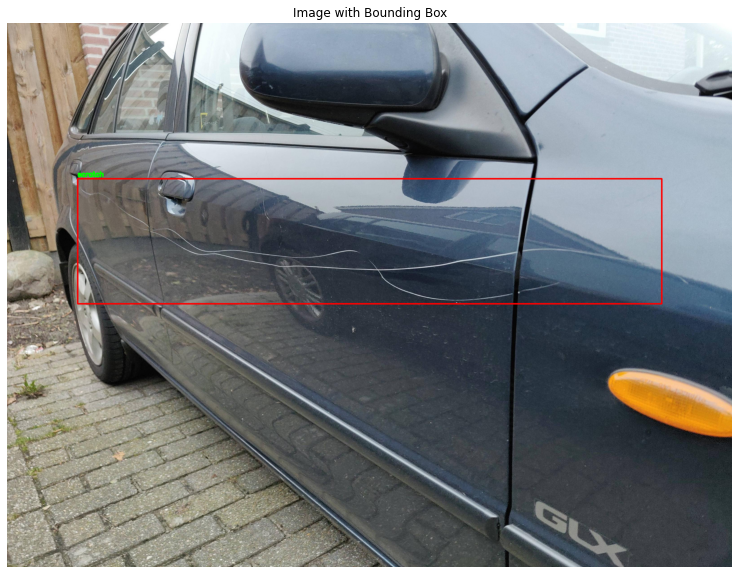

Image: (183, 276, 3)
Coordinates: (71, 49), (206, 115)


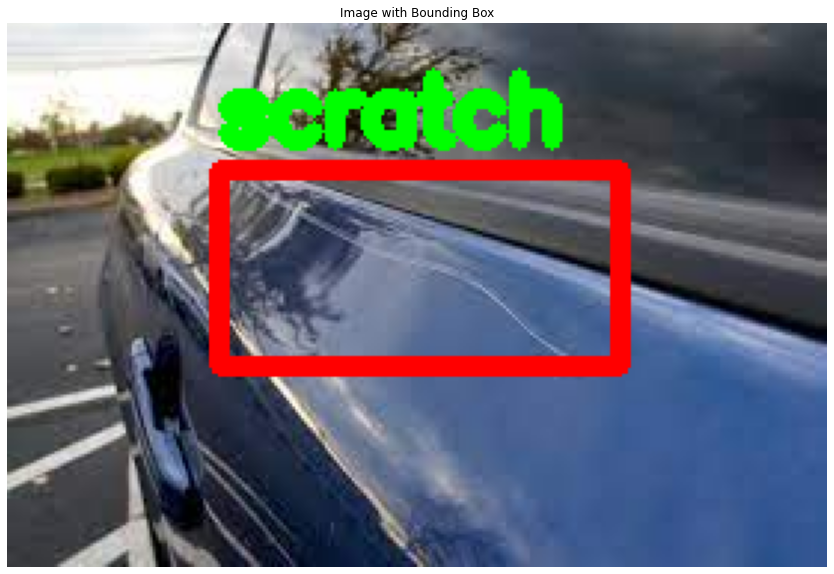

In [26]:
least_objects_img_ids = train["filename"].value_counts().tail(50).index.values
for img_id in random.sample(list(least_objects_img_ids), 5):
  plot_bbox(img_id)

#Lets Check the class distribution

In [27]:
train["class"].value_counts()

scratch    59
Name: class, dtype: int64

There are total 7 classes , out of 7 classes 3 are in minority and 4 are in majority classes.

In [30]:





train_df = train[:int(train.shape[0]*0.9)]

# for training
with open("annotation.txt", "w+") as f:
  for idx, row in train_df.iterrows():
      img = cv2.imread(row['path'])
      height, width = img.shape[:2]
      x1 = int(row['xmin'])
      x2 = int(row['xmax'])
      y1 = int(row['ymin'])
      y2 = int(row['ymax'])
      
      #google_colab_file_path = 'drive/My Drive/AI/Dataset/Open Images Dataset v4 (Bounding Boxes)/train'
      fileName = row['path']
      className = row['class']
      f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')

#Testing Dataset annotation

In [40]:
test_df = train[int(train.shape[0]*0.9):]

# for test
with open("test_annotation.txt", "w+") as f:
  for idx, row in test_df.iterrows():
      sys.stdout.write(str(idx) + '\r')
      sys.stdout.flush()
      img = cv2.imread(row['path'])
      height, width = img.shape[:2]
      x1 = int(row['xmin'])
      x2 = int(row['xmax'])
      y1 = int(row['ymin'])
      y2 = int(row['ymax'])
      
      #google_colab_file_path = 'drive/My Drive/AI/Dataset/Open Images Dataset v4 (Bounding Boxes)/test'
      fileName = row['path']
      className = row['class']
      f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')
